# Counterflow ethane/air diffusion flame

## Cantera Tutorial Example 

## Section 1:/ Counterflow Diffusion Flame 


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      2.67e-06      7.027
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.561e-05      5.556
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0007794      5.174
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.005918      3.776
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

..............................................................................
Attempt Newton solution of steady-state probl

   0.006313    8.34e-05   9.242e-09   5.759e-09   4.898e-06   1.576e-07 
   0.006344   7.611e-05   8.081e-09   6.223e-09   4.644e-06   1.612e-07 
   0.006375   6.764e-05    6.29e-09   6.303e-09    4.23e-06   1.605e-07 
   0.006406   5.823e-05    4.27e-09   5.841e-09   3.649e-06   1.548e-07 
   0.006438   4.837e-05   2.497e-09   4.818e-09   2.939e-06   1.437e-07 
   0.006453    4.35e-05   1.815e-09   4.167e-09   2.568e-06   1.364e-07 
   0.006469   3.875e-05   1.281e-09    3.47e-09     2.2e-06    1.28e-07 
   0.006484   3.419e-05   8.845e-10    2.78e-09   1.846e-06   1.189e-07 
     0.0065    2.99e-05   6.045e-10   2.143e-09    1.52e-06   1.091e-07 
   0.006531   2.224e-05   2.938e-10   1.144e-09   9.701e-07   8.895e-08 
   0.006563   1.604e-05   1.599e-10   5.327e-10   5.795e-07   6.966e-08 
   0.006594   1.125e-05   9.788e-11   2.166e-10   3.264e-07   5.267e-08 
   0.006625   7.694e-06   6.359e-11   7.174e-11   1.727e-07   3.861e-08 
   0.006688   3.523e-06   2.877e-11   9.393e-12   5

Attempt Newton solution of steady-state problem...    success.

Problem solved on [96] point grid(s).

..............................................................................
grid refinement disabled.


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> fuel_inlet <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    Mass Flux:         0.24 kg/m^2/s 
    Temperature:        300 K 
    Mass Fractions: 
                    C2H6           1 



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> flame <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    Pressure:   1.013e+05 Pa

-------------------------------------------------------------------------------
          z    velocity  spread_rate           T      lambda      eField 
-------------------------------------------------------------------------------
          0      0.1965  -4.274e-19         300       -2638           0 
      0.001      0.1856       10.99         300       -2638           0 
      0.002       0.153       21.99       300.2       -2638           0 
     0.0025      0.12

      0.014  -2.979e-26  -3.284e-30   1.864e-21   1.883e-21   1.828e-33 
      0.016  -3.052e-28  -3.333e-34   5.478e-23   3.679e-23   3.325e-36 
      0.018  -3.052e-30   1.204e-37   1.497e-24   6.675e-25   5.292e-39 
       0.02  -7.113e-32   3.566e-39   3.996e-26   1.183e-26   8.713e-41 

-------------------------------------------------------------------------------
          z          NO         NO2         N2O         HNO          CN 
-------------------------------------------------------------------------------
          0   2.251e-10   2.544e-11   1.828e-13    1.34e-15   4.859e-19 
      0.001   3.269e-09   4.485e-10   3.594e-12   1.256e-14   1.101e-17 
      0.002   4.519e-08   7.515e-09   6.662e-11   1.683e-13   2.481e-17 
     0.0025   2.309e-07   4.517e-08   4.369e-10   8.621e-13   1.649e-17 
      0.003   1.215e-06   2.814e-07   2.982e-09    4.55e-12   2.556e-18 
    0.00325   2.866e-06   7.378e-07   8.336e-09    1.07e-11   2.839e-19 
     0.0035   6.381e-06   1.814e-06 

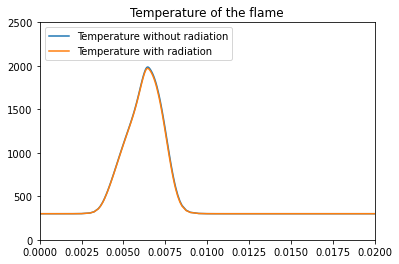

In [14]:
"""
An opposed-flow ethane/air diffusion flame

Requires: cantera >= 2.5.0, matplotlib >= 2.0
Keywords: combustion, 1D flow, diffusion flame, strained flame, plotting,
          saving output
"""

import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# Input parameters
p = ct.one_atm  # pressure# Initiate interesting vectors
tin_f = 300.0  # fuel inlet temperature
tin_o = 300.0  # oxidizer inlet temperature
mdot_o = 0.72  # kg/m^2/s
mdot_f = 0.24  # kg/m^2/s

comp_o = 'O2:0.21, N2:0.78, AR:0.01'  # air composition
comp_f = 'C2H6:1'  # fuel composition

width = 0.02  # Distance between inlets is 2 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

# Create the gas object used to evaluate all thermodynamic, kinetic, and
# transport properties.
gas = ct.Solution('gri30.yaml')
gas.TP = gas.T, p

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)

# Set the state of the two inlets
f.fuel_inlet.mdot = mdot_f
f.fuel_inlet.X = comp_f
f.fuel_inlet.T = tin_f

f.oxidizer_inlet.mdot = mdot_o
f.oxidizer_inlet.X = comp_o
f.oxidizer_inlet.T = tin_o

# Set the boundary emissivities
f.boundary_emissivities = 0.0, 0.0
# Turn radiation off
f.radiation_enabled = False

f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
f.solve(loglevel, auto=True)
f.show_solution()
try:
    # save to HDF container file if h5py is installed
    f.write_hdf('diffusion_flame.h5', mode='w')
except ImportError:
    f.save('diffusion_flame.yaml')

# write the velocity, temperature, and mole fractions to a CSV file
f.write_csv('diffusion_flame.csv', quiet=False)

f.show_stats(0)

# Plot Temperature without radiation
figTemperatureModifiedFlame = plt.figure()
plt.plot(f.flame.grid, f.T, label='Temperature without radiation')
plt.title('Temperature of the flame')
plt.ylim(0,2500)
plt.xlim(0.000, 0.020)

# Turn on radiation and solve again
f.radiation_enabled = True
f.solve(loglevel=1, refine_grid=False)
f.show_solution()

# Plot Temperature with radiation
plt.plot(f.flame.grid, f.T, label='Temperature with radiation')
plt.legend()
plt.legend(loc=2)
plt.savefig('./diffusion_flame.pdf')

## Section 2:/ Added Post-Processing 

In [ ]:
ifuel = gas.species_index('C2H6')
io2 = gas.species_index('O2')
ico = gas.species_index('CO')

# Initiate interesting vectors
c2h6 = np.zeros(f.flame.n_points,'d')
o2 = np.zeros(f.flame.n_points,'d')
co = np.zeros(f.flame.n_points,'d')

for n in range(f.flame.n_points):
    f.set_gas_state(n)
    c2h6[n] = gas.Y[ifuel]
    o2[n] = gas.Y[io2]
    co[n] = gas.Y[ico]

plt.plot(f.flame.grid,c2h6/np.max(c2h6), 
         f.flame.grid,o2/np.max(o2),
         f.flame.grid,co/np.max(co)) 
plt.xlabel(r'Physical space [m]', fontsize=15)
plt.ylabel('Normalized values of different quantities',fontsize=15)
plt.legend(['$Y_{C_2H_6}$', '$Y_{O_2}$', '$Y_{CO}$'],fontsize=15)